In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 1. BACA DATA
file_path = "simpan_dataset_stok_alat_sewa.csv"
df = pd.read_csv(file_path)
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors='coerce')
df["Bulan"] = df["Tanggal"].dt.month

In [26]:
# 2. NORMALISASI NAMA BARANG
# Pisahkan nama barang per baris
df = df.dropna(subset=["Nama Barang"])
df["Nama Barang"] = df["Nama Barang"].str.split(",")
df = df.explode("Nama Barang")
df["Nama Barang"] = df["Nama Barang"].str.strip()

In [27]:
# 3. HARGA SEWA PER ITEM
harga_sewa = {
    "Tenda": 50000,
    "Matras": 25000,
    "Kompor": 20000,
    "Lampu": 10000,
    "Kursi": 20000,
    "Gas Rent": 20000,
    "Gas Tukar": 22000,
    "Sarung Tangan": 15000,
    "Sleeping Bag": 30000,
    "Carrier": 60000,
    "Jaket": 25000,
    "Flysheet": 20000,
    "Headlamp": 10000,
    "Nest": 15000,
    "Tali": 5000,
    "Panci": 15000,
    "Trekking Pole": 25000,
    "Kompor Portable": 20000,
    "Cover Bag": 10000,
    "Trash Bag": 5000
}
df["Harga Sewa"] = df["Nama Barang"].map(harga_sewa)
df["Estimasi Pemasukan"] = df["Jumlah"] * df["Harga Sewa"]

In [28]:
# 4. AGREGASI PER BULAN DAN BARANG
agg_df = df.groupby(["Bulan", "Nama Barang"], as_index=False).agg({
    "Jumlah": "sum",
    "Estimasi Pemasukan": "sum"
})
agg_df.rename(columns={"Jumlah": "Total Disewa"}, inplace=True)

In [29]:
# 5. SIMPAN DATA HASIL
agg_df.to_csv("processed_prediksi_barang_terlaris.csv", index=False)

/tmp/ipython-input-2060331420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_income, x="Bulan", y="Estimasi Pemasukan", palette="viridis")


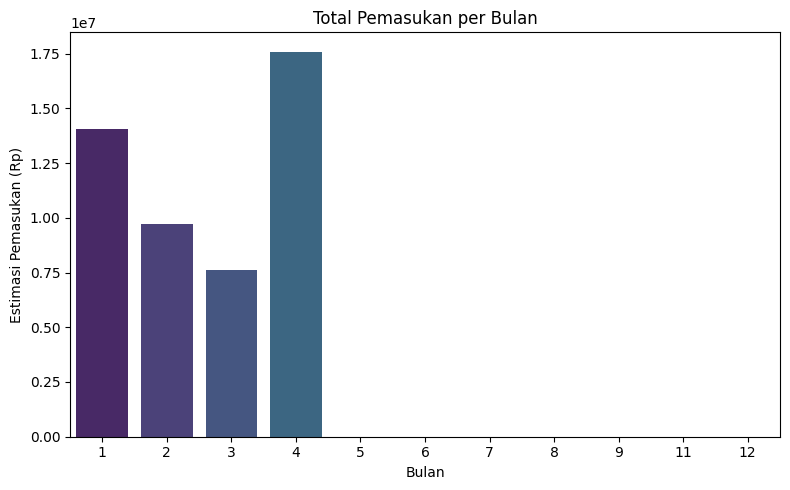

/tmp/ipython-input-2060331420.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_barang, x="Total Disewa", y="Nama Barang", palette="rocket")


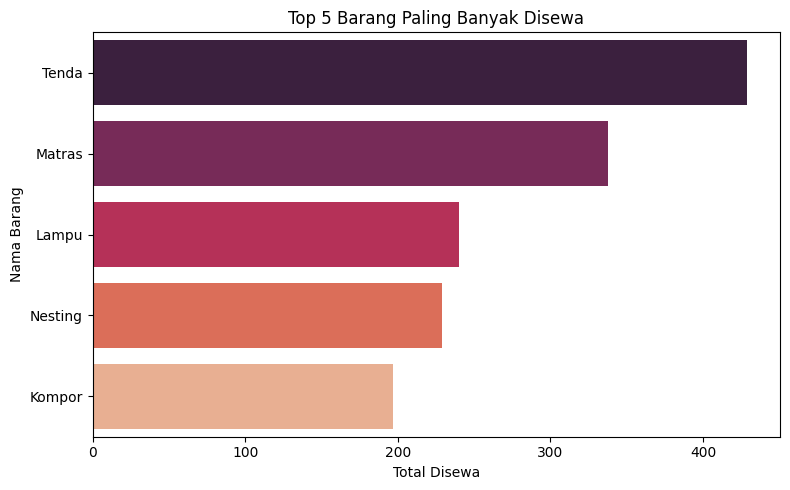

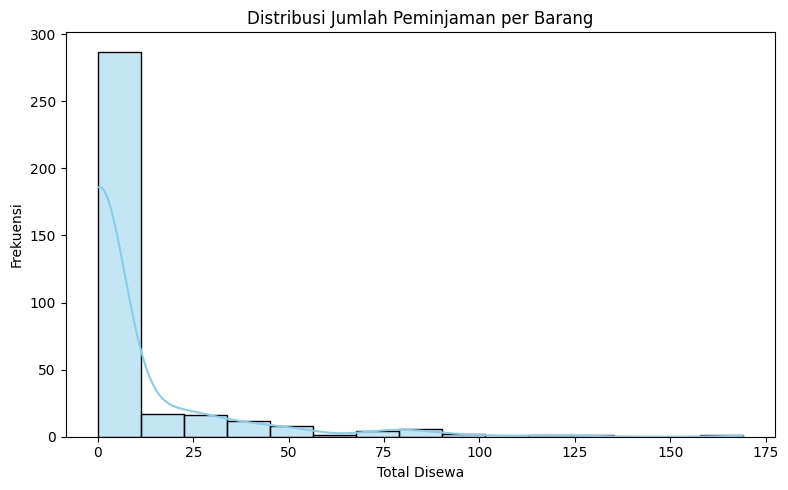

In [30]:
# 6. VISUALISASI
plt.figure(figsize=(8, 5))
monthly_income = agg_df.groupby("Bulan")["Estimasi Pemasukan"].sum().reset_index()
sns.barplot(data=monthly_income, x="Bulan", y="Estimasi Pemasukan", palette="viridis")
plt.title("Total Pemasukan per Bulan")
plt.ylabel("Estimasi Pemasukan (Rp)")
plt.xlabel("Bulan")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
top_barang = agg_df.groupby("Nama Barang")["Total Disewa"].sum().nlargest(5).reset_index()
sns.barplot(data=top_barang, x="Total Disewa", y="Nama Barang", palette="rocket")
plt.title("Top 5 Barang Paling Banyak Disewa")
plt.xlabel("Total Disewa")
plt.ylabel("Nama Barang")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(agg_df["Total Disewa"], bins=15, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Peminjaman per Barang")
plt.xlabel("Total Disewa")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()